# Assignment 3 - Predicting Hand-Written Digits
Machine Learning

Richard Teller

Let's load in the hand written digit images from scikit-learn.

In [42]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


Now display one of the sample digits:

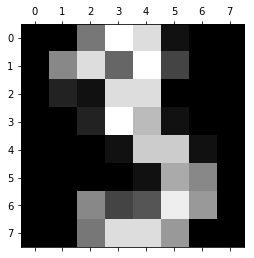

In [43]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[3]) 
plt.show() 

Seperate the predictor from the response data:

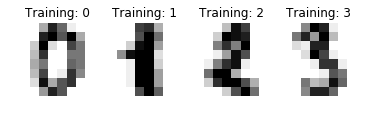

In [44]:
images_and_labels = list(zip(digits.images, digits.target))


for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

plt.show()

In [45]:
# flatten the image.
# turn the data into a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

Seperate the data into training and testing groups:

In [49]:
from sklearn.model_selection import train_test_split

X = digits.data[:, :64]
Y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

X_train.shape, y_train.shape

((1437, 64), (1437,))

Create the Logistic Regression model:

In [50]:
model = linear_model.LogisticRegression(solver = 'lbfgs') # create a LogReg model object

model.fit(X_train, y_train) # fit the model to our data

y_predicted = model.predict(X_test)

Create the Confusion Matrix:

In [51]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_predicted)
print('Confusion matrix')
print(confusion)

Confusion matrix
[[42  0  0  0  1  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  0  1  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  1  0 29  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  0  0  0  0  1  0  0 27  1]
 [ 0  0  0  0  0  1  0  0  1 32]]


Display the accuracy of the model:

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        43
          1       1.00      0.97      0.99        35
          2       1.00      0.97      0.99        36
          3       0.95      0.95      0.95        41
          4       0.97      1.00      0.99        38
          5       0.94      0.97      0.95        30
          6       1.00      1.00      1.00        37
          7       1.00      0.97      0.99        37
          8       0.90      0.93      0.92        29
          9       0.91      0.94      0.93        34

avg / total       0.97      0.97      0.97       360



### Questions

**Which digits are most often confused by the model?**

The digit most often confused would be where there are a lot of numbers in each column for a single row.  This would mean for that particular digit (the row) the model thought it was many different numbers (the columns).  In our model we see it did a pretty good job of predicting the digits because there are very few numbers that are placed not on the diagonal.  By looking at the confusion matrix we see the digits 3, 8, and 9 are confused the most (each predicted 2 wrong digits).  However if the matrix was a lot messier we may want to do something like this to display the most confused digits:

In [90]:
# To find the total number of incorrect predictions for each digit we can sum the values in the row
# and then subtract the diagonal entry for that row (since the diagonal value were the correct predictions)

print("Digit followed by Incorrect Predictions")
i = 0
while i < 10:
    badPredictions = confusion[i].sum() - confusion.diagonal()[i]
    print("%d: %d" % (i, badPredictions))
    i += 1


Digit followed by Incorrect Predictions
0: 1
1: 1
2: 1
3: 2
4: 0
5: 1
6: 0
7: 1
8: 2
9: 2


Thus again, we see digits 3, 8, and 9 have the most incorrect predictions.

**What is the accuracy of the model?**

The accuracy is (how many predicted correctly) / (how many total tested).  We can find how many were predicted correctly by summing the diagonal with the following code ``` confusion.diagonal().sum()``` and we can find the total tested with ```y_test.shape```

In [66]:
print(confusion.diagonal().sum())
print(y_test.shape)

349
(360,)


Thus we have 349/360 = 0.96945 (Notice 360 is also the final entry in the support column in the table above and accuracy would be the final entry in the precision column).

**Which digits are most often recognized correctly?**

The digits with a perfect score of being predicted 100% of the time are digits 4 and 6.  They only have a number in their diagonal and 0's everywhere else in the row.  Having only a number in the diagonal is saying, everytime we had the digit 4, we predicted 4, for example.  The number itself is telling us how many times we made that correct prediction. Notice digits 4 and 6 have 0 bad predictions in my print out.

**Which are recognized incorrectly?**

Any number that is not on the diagonal indicates an incorrect prediction.  So for example in the first row we see a 1 in the fifth column.  This is saying that we had the digit 0 (because we're in the first row), but the model predicted a 4 (because fifth column).  And also in the next row, which represents the digit 1, we see we had a 1 in the second to last column which tells us that we had the digit 1 but we predicted an 8.  Again, anywhere there is a number that is not on the diagonal represents an incorrect prediction.  The number itself tells us how many times we made that incorrect prediction (how many 1's we thought were 7's, for example).